In [1]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.preprocessing import LabelEncoder



In [3]:
df= pd.read_csv('feature_matrix.csv')

In [4]:
df

,id,dhw_mean,dhw_var,dhw_std,ttc_mean,ttc_var,ttc_std,yVelocity_mean,yVelocity_var,yVelocity_std,dyn_ttc_derivative_mean,dyn_ttc_derivative_std,dyn_yVelocity_mean,dyn_yVelocity_std,dyn_dhw_mean,dyn_dhw_std,style_label
0,4.0,14.624392,0.899300,0.948314,3.342222,0.131018,0.361965,0.117672,0.000871,0.029507,-0.068235,0.007276,0.117672,0.029507,14.624392,0.948314,2
1,8.0,17.680000,0.528520,0.726994,1.750000,0.005600,0.074833,1.236667,0.000147,0.012111,-0.040000,0.000000,1.236667,0.012111,17.680000,0.726994,0
2,11.0,7.005000,0.001250,0.035355,3.930000,0.005000,0.070711,0.080000,0.000000,0.000000,-0.100000,NaN,0.080000,0.000000,7.005000,0.035355,0
3,17.0,25.710784,27.835286,5.275916,2.897843,0.429109,0.655064,0.798805,0.086494,0.294098,-0.043800,0.004903,0.798805,0.294098,25.710784,5.275916,1
4,19.0,17.842949,2.063572,1.436514,3.294031,0.156272,0.395313,0.657432,0.001739,0.041698,-0.006474,0.025876,0.657432,0.041698,17.842949,1.436514,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,2682.0,16.675891,3.094417,1.759096,2.964444,0.119864,0.346214,0.025891,0.000428,0.020696,-0.043462,0.004852,0.025891,0.020696,16.675891,1.759096,2
261,2701.0,19.940000,NaN,NaN,4.000000,NaN,NaN,0.930000,NaN,NaN,NaN,NaN,0.930000,NaN,19.940000,NaN,2
262,2742.0,30.992857,0.487560,0.698255,3.865714,0.008295,0.091078,1.131429,0.000174,0.013184,-0.041667,0.004082,1.131429,0.013184,30.992857,0.698255,1
263,2804.0,10.424062,0.353611,0.594652,3.460588,0.106368,0.326142,0.995994,0.000722,0.026873,-0.065000,0.007303,0.995994,0.026873,10.424062,0.594652,0


# Modellierung

In [34]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="style_label")
y = df["style_label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [36]:
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(3, activation="softmax")
])


C:\Users\mofis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [38]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.2878 - loss: 2.6050 - val_accuracy: 0.2326 - val_loss: 1.1001
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4839 - loss: 1.0964 - val_accuracy: 0.2326 - val_loss: 1.1016
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4480 - loss: 1.0958 - val_accuracy: 0.2326 - val_loss: 1.1030
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4635 - loss: 1.0937 - val_accuracy: 0.2326 - val_loss: 1.1045
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4362 - loss: 1.0933 - val_accuracy: 0.2326 - val_loss: 1.1062
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4344 - loss: 1.0920 - val_accuracy: 0.2326 - val_loss: 1.1080
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4456 - loss: 1.0901 - val_accuracy: 0.2326 - val_loss: 1.1097
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4590 - loss: 1.0876 - val_accuracy: 0.2326 - val_loss: 1.1113


In [39]:
model_reg = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(1)
])

model_reg.compile(
    optimizer="adam",
    loss="mse"
)


C:\Users\mofis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


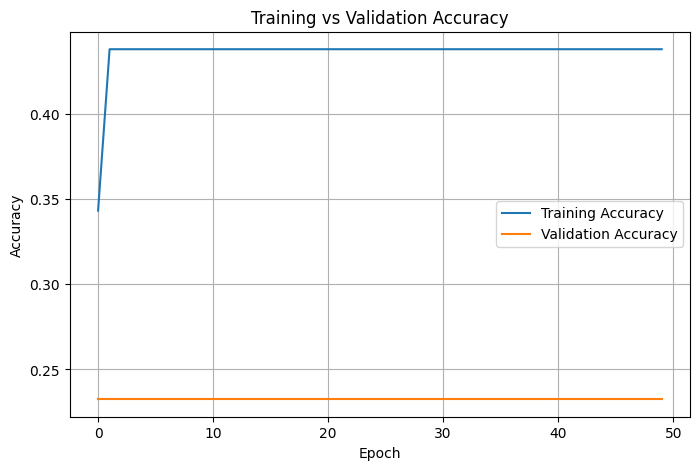

In [40]:


plt.figure(figsize=(8, 5))

plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


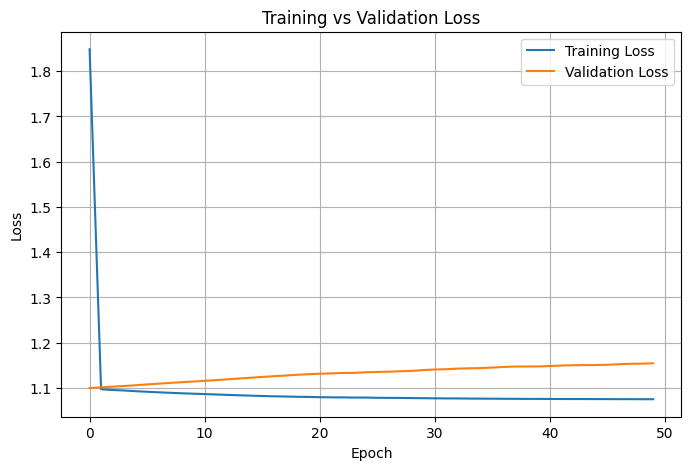

In [41]:
plt.figure(figsize=(8, 5))

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


In [42]:
import numpy as np

y_pred = model.predict(X_test).argmax(axis=1)

conf_matrix = pd.crosstab(
    y_test, y_pred,
    rownames=["Actual"],
    colnames=["Predicted"]
)

print(conf_matrix)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/stepWARNING:tensorflow:6 out of the last 10 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000200D5CD16C0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted   0
Actual       
0          21
1          17
2          15


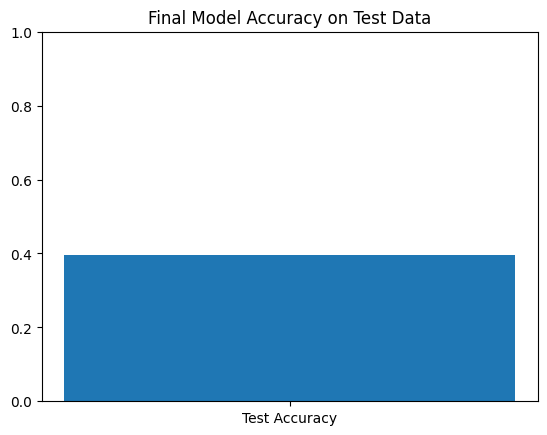

In [43]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

plt.bar(["Test Accuracy"], [test_accuracy])
plt.ylim(0, 1)
plt.title("Final Model Accuracy on Test Data")
plt.show()


In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Predict TTC on test data
y_pred_ttc = model_reg.predict(X_test).flatten()
y_true_ttc = y_test.values if hasattr(y_test, "values") else y_test


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


### scatter plot for Actual TTC vs Predicted TTC

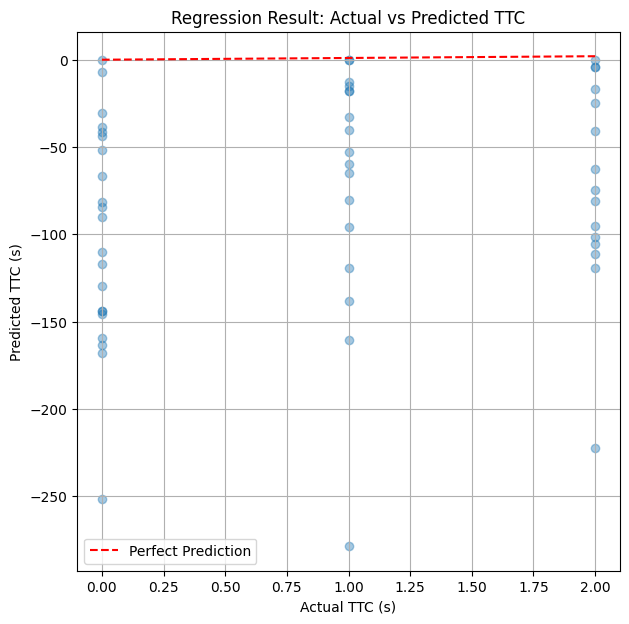

In [45]:
plt.figure(figsize=(7, 7))

plt.scatter(y_true_ttc, y_pred_ttc, alpha=0.4)
plt.plot(
    [y_true_ttc.min(), y_true_ttc.max()],
    [y_true_ttc.min(), y_true_ttc.max()],
    "r--",
    label="Perfect Prediction"
)

plt.xlabel("Actual TTC (s)")
plt.ylabel("Predicted TTC (s)")
plt.title("Regression Result: Actual vs Predicted TTC")
plt.legend()
plt.grid(True)
plt.show()


### As the model has low accuracy thats why the Prediction is also not good
###### Near to the red line is good prediction

### Evaluation Metrics

In [46]:
mse = np.mean((y_true_ttc - y_pred_ttc) ** 2)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 10980.894768926184


In [47]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 104.78976461909906


In [48]:
mre = np.mean(np.abs((y_true_ttc - y_pred_ttc) / y_true_ttc))
print("Mean Relative Error (MRE):", mre)


Mean Relative Error (MRE): nan


C:\Users\mofis\AppData\Local\Temp\ipykernel_22244\1571903674.py:1: RuntimeWarning: divide by zero encountered in divide
  mre = np.mean(np.abs((y_true_ttc - y_pred_ttc) / y_true_ttc))
C:\Users\mofis\AppData\Local\Temp\ipykernel_22244\1571903674.py:1: RuntimeWarning: invalid value encountered in divide
  mre = np.mean(np.abs((y_true_ttc - y_pred_ttc) / y_true_ttc))


In [49]:
error_std = np.std(y_true_ttc - y_pred_ttc)
print("Standard Deviation of Error:", error_std)


Standard Deviation of Error: 64.82431262748473


In [50]:
correlation = np.corrcoef(y_true_ttc, y_pred_ttc)[0, 1]
print("Correlation:", correlation)


Correlation: 0.18274760683107216


## Classification Metrics
#### Accuracy, Precision, Recall, F1-score

In [51]:
y_pred_class = model.predict(X_test).argmax(axis=1)
y_true_class = y_test.values if hasattr(y_test, "values") else y_test


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [52]:
accuracy = np.mean(y_pred_class == y_true_class)
print("Accuracy:", accuracy)


Accuracy: 0.39622641509433965


In [53]:
def precision_recall_f1(y_true, y_pred, label):
    tp = np.sum((y_pred == label) & (y_true == label))
    fp = np.sum((y_pred == label) & (y_true != label))
    fn = np.sum((y_pred != label) & (y_true == label))

    precision = tp / (tp + fp + 1e-9)
    recall = tp / (tp + fn + 1e-9)
    f1 = 2 * precision * recall / (precision + recall + 1e-9)

    return precision, recall, f1


In [54]:
for lbl in np.unique(y_true_class):
    p, r, f1 = precision_recall_f1(y_true_class, y_pred_class, lbl)
    print(f"Class {lbl} → Precision: {p:.3f}, Recall: {r:.3f}, F1: {f1:.3f}")


Class 0 → Precision: 0.396, Recall: 1.000, F1: 0.568
Class 1 → Precision: 0.000, Recall: 0.000, F1: 0.000
Class 2 → Precision: 0.000, Recall: 0.000, F1: 0.000
